In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.options.mode.chained_assignment = None

In [29]:
data_path_BTPH = fr'Data\Full_BTPH.xlsx'
data_path_GSK= fr'Data\Full_GSK.xlsx'
data_path_FERM= fr'Data\Full_ferm.xlsx'

In [30]:
data_BTPH_excel = pd.ExcelFile(data_path_BTPH)
data_GSK_excel = pd.ExcelFile(data_path_GSK)
data_FERM_excel = pd.ExcelFile(data_path_FERM)

In [60]:
drop_columns = ['Carbon_Glucose', 'Carbon_Acetate', 'Carbon','Time_OUR', 
    'Induction_OUR', 'OUR', 'OUR_offset','CPR_div_Biomass', 'CPR_div_BiomassEst', 'dt',
    'int f(OUR)', 'int beta(t)/alfa(t) dt', 'Xkr @AgeB_on', 'Age_online',
    'X*_online', 'in Xdt', 'index', 'Average X', 'Error', 'Error OUR',
    'OUR_est', 'miu', 'Ysx', 'SUM OUR error', 'Bioreactor weight_kg',
    'Feedg_min', 'Real Feed rate', 'S', 'Current_gluc', 'Mju_teorinis',
    'Glucose_cons_max', 'Possible_mju', 'Current_cunsumption','Feedg', 'dFeedg',
    'Current_mju', 'index.1', 'GlucoseEst', 'Error_GlucoseEst','GlucFeed_div_BiomassEst',
    'dGlucFeed_div_BiomassEst', 'Feed_div_BiomassEst','Inter_BioWeight', 'OUR g/h', 'Beta_maintenance', 'Beta_product']

GlucoseToCarbonConst = (12.01*6.)/180.156
IsoleucineToCarbonConst = (12.01*6.)/131.17

0.39998667821221606

In [61]:
sheet = data_BTPH_excel.parse(1)
sheet = sheet.loc[:,~sheet.columns.str.match("Unnamed")]
sheet.dropna(axis=0, subset = ['Time'], inplace=True)
sheet.drop(columns=drop_columns, inplace=True, errors='ignore')
sheet['CumulativeAge'] = sheet['AgemultBiomass']
sheet.drop(columns='AgemultBiomass', inplace=True)

sheet['Carbon'] = sheet['Glucose'].multiply(GlucoseToCarbonConst)
sheet['Carbon0'] = sheet['Carbon'].loc[0]
sheet['Carbon_Feed'] = sheet['Glucose_Feed'].multiply(GlucoseToCarbonConst)
sheet['dCarbon_Feed'] = sheet['dGlucose_Feed'].multiply(GlucoseToCarbonConst)
sheet.drop(columns=['Glucose', 'Glucose0', 'Glucose_Feed', 'dGlucose_Feed'], inplace=True)

display(sheet.shape)
display(sheet.columns)
display(sheet.head(n = 20))


(17, 25)

Index(['Time', 'dTime', 'BioWeight', 'dBioWeight', 'Protein', 'dProtein',
       'OUR_h', 'dOUR_h', 'Biomass', 'dBiomass', 'CPR', 'dCPR', 'Induction',
       'BiomassEst', 'Biomass0', 'dBiomassEst', 'Age', 'miuSimp', 'Acetate',
       'dAcetate', 'CumulativeAge', 'Carbon', 'Carbon0', 'Carbon_Feed',
       'dCarbon_Feed'],
      dtype='object')

,Time,dTime,BioWeight,dBioWeight,Protein,dProtein,OUR_h,dOUR_h,Biomass,dBiomass,CPR,dCPR,Induction,BiomassEst,Biomass0,dBiomassEst,Age,miuSimp,Acetate,dAcetate,CumulativeAge,Carbon,Carbon0,Carbon_Feed,dCarbon_Feed
0,0.0,0.0,3.746,0.000,0.00,0.00,0.027249,0.027249,0.1324,0.1324,0.000000,0.000000,0.0,0.132400,0.1324,0.000000,0.000000,0.000000,0.0468,0.0468,0.000000,1.960015,1.960015,0.000000,0.000000
1,1.0,1.0,3.929,0.183,0.00,0.00,0.096825,0.069576,0.2360,0.1036,0.104105,0.104105,0.0,0.192875,0.1324,0.060475,0.403619,0.313545,0.0988,0.0520,0.077848,1.895177,1.960015,0.000000,0.000000
2,2.0,1.0,3.907,-0.022,0.00,0.00,0.168130,0.071304,0.4408,0.2048,0.199049,0.094944,0.0,0.363608,0.1324,0.170733,0.963514,0.469552,0.0975,-0.0013,0.350341,1.650185,1.960015,0.000000,0.000000
3,3.0,1.0,3.888,-0.019,0.00,0.00,0.314465,0.146336,0.8504,0.4096,0.429297,0.230248,0.0,0.677853,0.1324,0.314245,1.264900,0.463589,0.0490,-0.0485,0.857416,1.333116,1.960015,0.000000,0.000000
4,4.0,1.0,3.863,-0.025,0.00,0.00,0.561707,0.247242,1.6332,0.7828,0.807680,0.378383,0.0,1.252047,0.1324,0.574194,1.436358,0.458604,0.0145,-0.0345,1.798388,0.662938,1.960015,0.000000,0.000000
5,5.0,1.0,3.839,-0.024,0.00,0.00,0.863327,0.301619,2.6812,1.0480,1.222605,0.414925,0.0,2.214688,0.1324,0.962640,1.578826,0.434662,0.0147,0.0002,3.496607,0.039999,1.960015,0.046443,0.046443
6,6.0,1.0,3.840,0.001,0.00,0.00,0.846161,-0.017165,3.5388,0.8576,1.210099,-0.012506,0.0,3.353913,0.1324,1.139225,1.870883,0.339670,0.0390,0.0243,6.274779,0.039999,1.960015,0.794818,0.748375
7,7.0,1.0,3.838,-0.002,0.00,0.00,1.182899,0.336738,4.8712,1.3324,1.734638,0.524539,0.0,4.692109,0.1324,1.338196,2.189081,0.285201,0.0705,0.0315,10.271405,0.039999,1.960015,2.114235,1.319417
8,8.0,1.0,3.852,0.014,0.00,0.00,1.712464,0.529566,7.2360,2.3648,2.681871,0.947233,0.0,6.598713,0.1324,1.906604,2.406041,0.288936,0.1140,0.0435,15.876774,0.039999,1.960015,4.001815,1.887580
9,9.0,1.0,3.831,-0.021,0.00,0.00,2.471493,0.759029,9.6184,2.3824,3.635871,0.953999,0.0,9.379542,0.1324,2.780829,2.538165,0.296478,0.1498,0.0358,23.806821,0.039999,1.960015,6.761581,2.759767


In [62]:
sheet = data_FERM_excel.parse(1)
sheet = sheet.loc[:,~sheet.columns.str.match("Unnamed")]
sheet.dropna(axis=0, subset = ['Time'], inplace=True)
sheet.drop(columns=drop_columns, inplace=True, errors='ignore')
sheet['CumulativeAge'] = sheet['Age'].multiply(sheet['BiomassEst'])
sheet['Biomass0'] = sheet['BiomassEst'].loc[0]
sheet['SGR'] = sheet['dBiomassEst'].divide(sheet['BiomassEst'].multiply(sheet['dTime']))
sheet['SGR'].loc[0] = 0.

sheet['Carbon'] = sheet['Glucose'].multiply(GlucoseToCarbonConst)
sheet['Carbon0'] = sheet['Carbon'].loc[0]
sheet['Carbon_Feed'] = sheet['Glucose_Feed'].multiply(GlucoseToCarbonConst)
sheet['dCarbon_Feed'] = sheet['dGlucose_Feed'].multiply(GlucoseToCarbonConst)
sheet.drop(columns=['Glucose', 'Glucose0', 'Glucose_Feed', 'dGlucose_Feed'], inplace=True)

display(sheet.shape)
display(sheet.columns)
display(sheet.head(n = 20))

(20, 23)

Index(['Time', 'dTime', 'BioWeight', 'dBioWeight', 'Protein', 'dProtein',
       'OUR_h', 'dOUR_h', 'Biomass', 'dBiomass', 'CPR', 'dCPR', 'Induction',
       'BiomassEst', 'dBiomassEst', 'Age', 'CumulativeAge', 'Biomass0', 'SGR',
       'Carbon', 'Carbon0', 'Carbon_Feed', 'dCarbon_Feed'],
      dtype='object')

,Time,dTime,BioWeight,dBioWeight,Protein,dProtein,OUR_h,dOUR_h,Biomass,dBiomass,CPR,dCPR,Induction,BiomassEst,dBiomassEst,Age,CumulativeAge,Biomass0,SGR,Carbon,Carbon0,Carbon_Feed,dCarbon_Feed
0,0.0,0.0,4.360000,0.000000,0.0000,0.0000,0.000000,0.000000,0.101105,0.101105,0.001787,0.001787,0.0,0.101105,0.101105,0.000000,0.000000,0.101105,0.000000,7.439752,7.439752,0.000000,0.000000
1,1.0,1.0,4.394425,0.034425,0.0000,0.0000,0.108704,0.108704,0.246740,0.145635,0.127383,0.125596,0.0,0.147268,0.046163,0.395403,0.058230,0.101105,0.313462,7.559748,7.439752,0.000000,0.000000
2,2.0,1.0,4.384414,-0.010011,0.0000,0.0000,0.250463,0.141759,0.485450,0.238710,0.298793,0.171410,0.0,0.306687,0.159419,0.902119,0.276668,0.101105,0.519810,7.399754,7.439752,0.000000,0.000000
3,3.0,1.0,4.366922,-0.017492,0.0000,0.0000,0.470090,0.219626,1.043900,0.558450,0.610969,0.312177,0.0,0.644703,0.338016,1.137665,0.733456,0.101105,0.524298,7.159762,7.439752,0.000000,0.000000
4,4.0,1.0,4.349401,-0.017521,0.0000,0.0000,1.407484,0.937395,2.157150,1.113250,1.364164,0.753195,0.0,1.343512,0.698809,1.256839,1.688578,0.101105,0.520136,6.439786,7.439752,0.000000,0.000000
5,5.0,1.0,4.317240,-0.032160,0.0000,0.0000,2.539898,1.132414,3.650000,1.492850,2.786519,1.422356,0.0,3.177006,1.833493,1.204948,3.828128,0.101105,0.577114,4.839839,7.439752,0.000000,0.000000
6,6.0,1.0,4.852775,0.535535,0.0000,0.0000,4.282562,1.742664,6.570000,2.920000,5.055362,2.268843,0.0,6.676188,3.499182,1.282744,8.563843,0.101105,0.524129,2.471918,7.439752,0.000000,0.000000
7,6.5,0.5,4.836291,-0.016484,0.0000,0.0000,2.019065,-2.263496,10.475500,3.905500,2.804385,-2.250977,0.0,10.680828,4.004640,1.391281,14.860029,0.101105,0.749874,0.007600,7.439752,0.000000,0.000000
8,7.0,0.5,4.843911,0.007620,0.0000,0.0000,4.451351,2.432286,12.300500,1.825000,4.287283,1.482897,0.0,12.568955,1.888126,1.653786,20.786366,0.101105,0.300443,0.000000,7.439752,0.019818,0.019818
9,7.5,0.5,4.878304,0.034393,0.0000,0.0000,5.919079,1.467727,14.454000,2.153500,7.566275,3.278993,0.0,14.511801,1.942847,1.892386,27.461929,0.101105,0.267761,0.009600,7.439752,1.417429,1.397611


In [70]:
sheet = data_GSK_excel.parse(1)
sheet = sheet.loc[:,~sheet.columns.str.match("Unnamed")]
sheet.dropna(axis=0, subset = ['Time'], inplace=True)
sheet.drop(columns=drop_columns, inplace=True, errors='ignore')
sheet['Protein'] = sheet['Protein g/L']
sheet.drop(columns=['Protein g/L', 'Time.1'], inplace=True)
sheet['CumulativeAge'] = sheet['AgemultBiomass']
sheet.drop(columns='AgemultBiomass', inplace=True)

sheet['Carbon'] = sheet['Glucose'].multiply(GlucoseToCarbonConst)
sheet['Carbon0'] = sheet['Carbon'].loc[0]
sheet['Carbon_Feed'] = sheet['Glucose_Feed'].multiply(GlucoseToCarbonConst).add(sheet['L-Isoleucine'].multiply(IsoleucineToCarbonConst))
sheet['dCarbon_Feed'] = sheet['Carbon_Feed'].subtract(sheet['Carbon_Feed'].shift())
sheet['dCarbon_Feed'].loc[0] = sheet['Carbon_Feed'].loc[0]
sheet.drop(columns=['Glucose', 'Glucose0', 'Glucose_Feed', 'dGlucose_Feed', 'L-Isoleucine'], inplace=True)

display(sheet.shape)
display(sheet.columns)
display(sheet.head(n = 20))

(18, 28)

Index(['Time', 'dTime', 'BioWeight', 'dBioWeight', 'OUR_h', 'dOUR_h',
       'Biomass', 'dBiomass', 'CPR', 'dCPR', 'Induction', 'BiomassEst',
       'Biomass0', 'dBiomassEst', 'Age', 'miuSimp', 'NH4', 'Phosphate',
       'Acetate', 'L-Lactate', 'L-Glutamate', 'L-Glutamine', 'Protein',
       'CumulativeAge', 'Carbon', 'Carbon0', 'Carbon_Feed', 'dCarbon_Feed'],
      dtype='object')

,Time,dTime,BioWeight,dBioWeight,OUR_h,dOUR_h,Biomass,dBiomass,CPR,dCPR,Induction,BiomassEst,Biomass0,dBiomassEst,Age,miuSimp,NH4,Phosphate,Acetate,L-Lactate,L-Glutamate,L-Glutamine,Protein,CumulativeAge,Carbon,Carbon0,Carbon_Feed,dCarbon_Feed
0,0.000000,0.000000,9.030500,0.000000,0.000000,0.000000,0.001155,0.000000,0.000000,0.000000,0.0,0.001155,0.001155,0.000000,0.000000,0.000000,3.439114,1.110699,0.000000,0.004845,0.004874,0.027785,0.000000,0.000000,14.324782,14.324782,0.452519,0.452519
1,17.000000,17.000000,8.885243,-0.145257,0.190980,8.885243,1.461759,1.460604,0.023367,0.023367,0.0,1.006322,0.001155,1.005167,3.810904,0.058756,3.605020,1.075092,0.002202,0.008461,0.019145,0.030238,0.000000,3.834997,12.725572,14.324782,0.380760,-0.071759
2,19.000000,2.000000,8.706002,-0.179241,1.367548,8.515023,4.072044,2.610285,1.213999,1.190633,0.0,4.420620,0.001155,3.414298,4.928592,0.386179,3.674853,0.837470,0.007532,0.013746,0.022012,0.037235,0.000000,21.787435,9.659993,14.324782,1.139464,0.758703
3,21.000000,2.000000,8.569089,-0.136914,3.985421,7.201541,12.633777,8.561733,4.520820,3.306820,0.0,9.781759,0.001155,5.361138,3.717834,0.274038,3.515855,0.229590,0.003110,0.026422,0.163429,0.070001,0.000000,36.366956,0.172092,14.324782,1.783695,0.644231
4,23.000000,2.000000,8.496487,-0.072602,2.583795,4.511066,15.922736,3.288958,4.292684,-0.228135,0.0,16.822873,0.001155,7.041115,3.746951,0.209272,3.425178,0.355263,0.004372,0.010768,0.110365,0.067655,0.000000,63.034476,0.007168,14.324782,2.794261,1.010567
5,38.000000,15.000000,10.308636,1.812149,3.681329,7.724841,46.985121,31.062386,3.210014,-1.082670,0.0,37.241510,0.001155,20.418637,7.982160,0.036552,2.425160,1.935392,0.007926,0.012417,0.069473,0.148359,0.000000,297.267677,0.025473,14.324782,2.483482,-0.310779
6,40.000000,2.000000,10.342206,0.033570,3.619894,6.660877,45.679979,-1.305142,4.702387,1.492373,0.0,52.557682,0.001155,15.316172,13.252049,0.145708,2.329990,2.112608,0.008405,0.012146,0.054784,0.163362,0.000000,696.496957,0.027362,14.324782,7.303990,4.820507
7,41.750000,1.750000,10.327718,-0.014488,3.571942,6.707824,46.985121,1.305142,4.684599,-0.017788,0.0,54.263321,0.001155,1.705640,14.687013,0.017962,2.356396,2.587303,0.009007,0.013884,0.105140,0.185812,0.000000,796.966127,0.018893,14.324782,7.675678,0.371689
8,42.083333,0.333333,10.336923,0.009205,3.444597,6.764981,47.246150,0.261028,4.478561,-0.206039,1.0,55.027479,0.001155,0.764158,15.479591,0.041661,2.424929,2.529585,0.012993,0.013024,0.147144,0.184833,0.000000,851.802843,0.028976,14.324782,7.982184,0.306506
9,42.416667,0.333333,10.342103,0.005180,3.325647,6.897506,46.463064,-0.783085,4.257158,-0.221403,1.0,55.156999,0.001155,0.129520,15.693244,0.007045,2.322642,2.995803,0.006470,0.013161,0.152427,0.188334,0.000000,865.592258,0.029530,14.324782,7.982036,-0.000148


In [14]:
from Load_CleanData import Load_Clean_FERM,Load_Clean_BTPH, Load_Clean_GSK

In [18]:
BTPH_data = Load_Clean_BTPH(load_clean=True)
FERM_data = Load_Clean_FERM(load_clean=True)
GSK_data = Load_Clean_GSK(load_clean=True)
dataPool = BTPH_data
display(dataPool.shape)
display(dataPool.head())

experiments = dataPool['Sheet'].unique()
display(experiments)

(283, 26)

,Time,dTime,BioWeight,dBioWeight,Protein,dProtein,OUR_h,dOUR_h,Biomass,dBiomass,...,Age,miuSimp,Acetate,dAcetate,CumulativeAge,Carbon,Carbon0,Carbon_Feed,dCarbon_Feed,Sheet
0,0.0,0.0,3.746,0.000,0.0,0.0,0.027249,0.027249,0.1324,0.1324,...,0.000000,0.000000,0.0468,0.0468,0.000000,1.960015,1.960015,0.0,0.0,BTPH_14
1,1.0,1.0,3.929,0.183,0.0,0.0,0.096825,0.069576,0.2360,0.1036,...,0.403619,0.313545,0.0988,0.0520,0.077848,1.895177,1.960015,0.0,0.0,BTPH_14
2,2.0,1.0,3.907,-0.022,0.0,0.0,0.168130,0.071304,0.4408,0.2048,...,0.963514,0.469552,0.0975,-0.0013,0.350341,1.650185,1.960015,0.0,0.0,BTPH_14
3,3.0,1.0,3.888,-0.019,0.0,0.0,0.314465,0.146336,0.8504,0.4096,...,1.264900,0.463589,0.0490,-0.0485,0.857416,1.333116,1.960015,0.0,0.0,BTPH_14
4,4.0,1.0,3.863,-0.025,0.0,0.0,0.561707,0.247242,1.6332,0.7828,...,1.436358,0.458604,0.0145,-0.0345,1.798388,0.662938,1.960015,0.0,0.0,BTPH_14


array(['BTPH_14', 'BTPH_21', 'BTPH_22', 'BTPH_24', 'BTPH_26', 'BTPH_27',
       'BTPH_28', 'BTPH_31', 'BTPH_33', 'BTPH_36', 'BTPH_37', 'BTPH_17',
       'BTPH_34', 'BTPH_23', 'BTPH_20', 'BTPH_18', 'BTPH_25'],
      dtype=object)

,Time,dTime,BioWeight,dBioWeight,Protein,dProtein,OUR_h,dOUR_h,Biomass,dBiomass,CPR,dCPR,Induction,BiomassEst,Biomass0,dBiomassEst,Age,CumulativeAge,Carbon,Carbon0,Carbon_Feed,dCarbon_Feed,Sheet


array([[<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

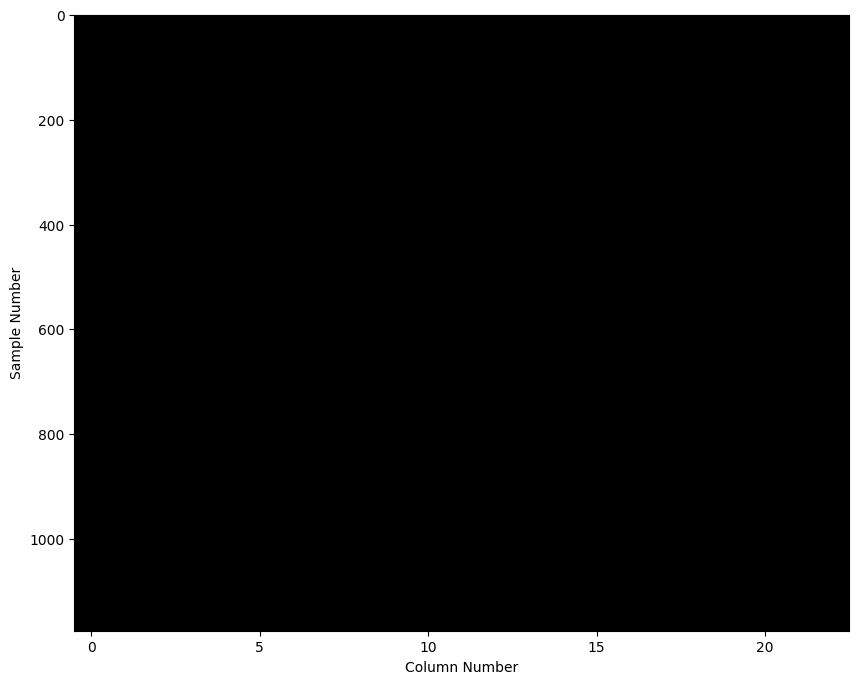

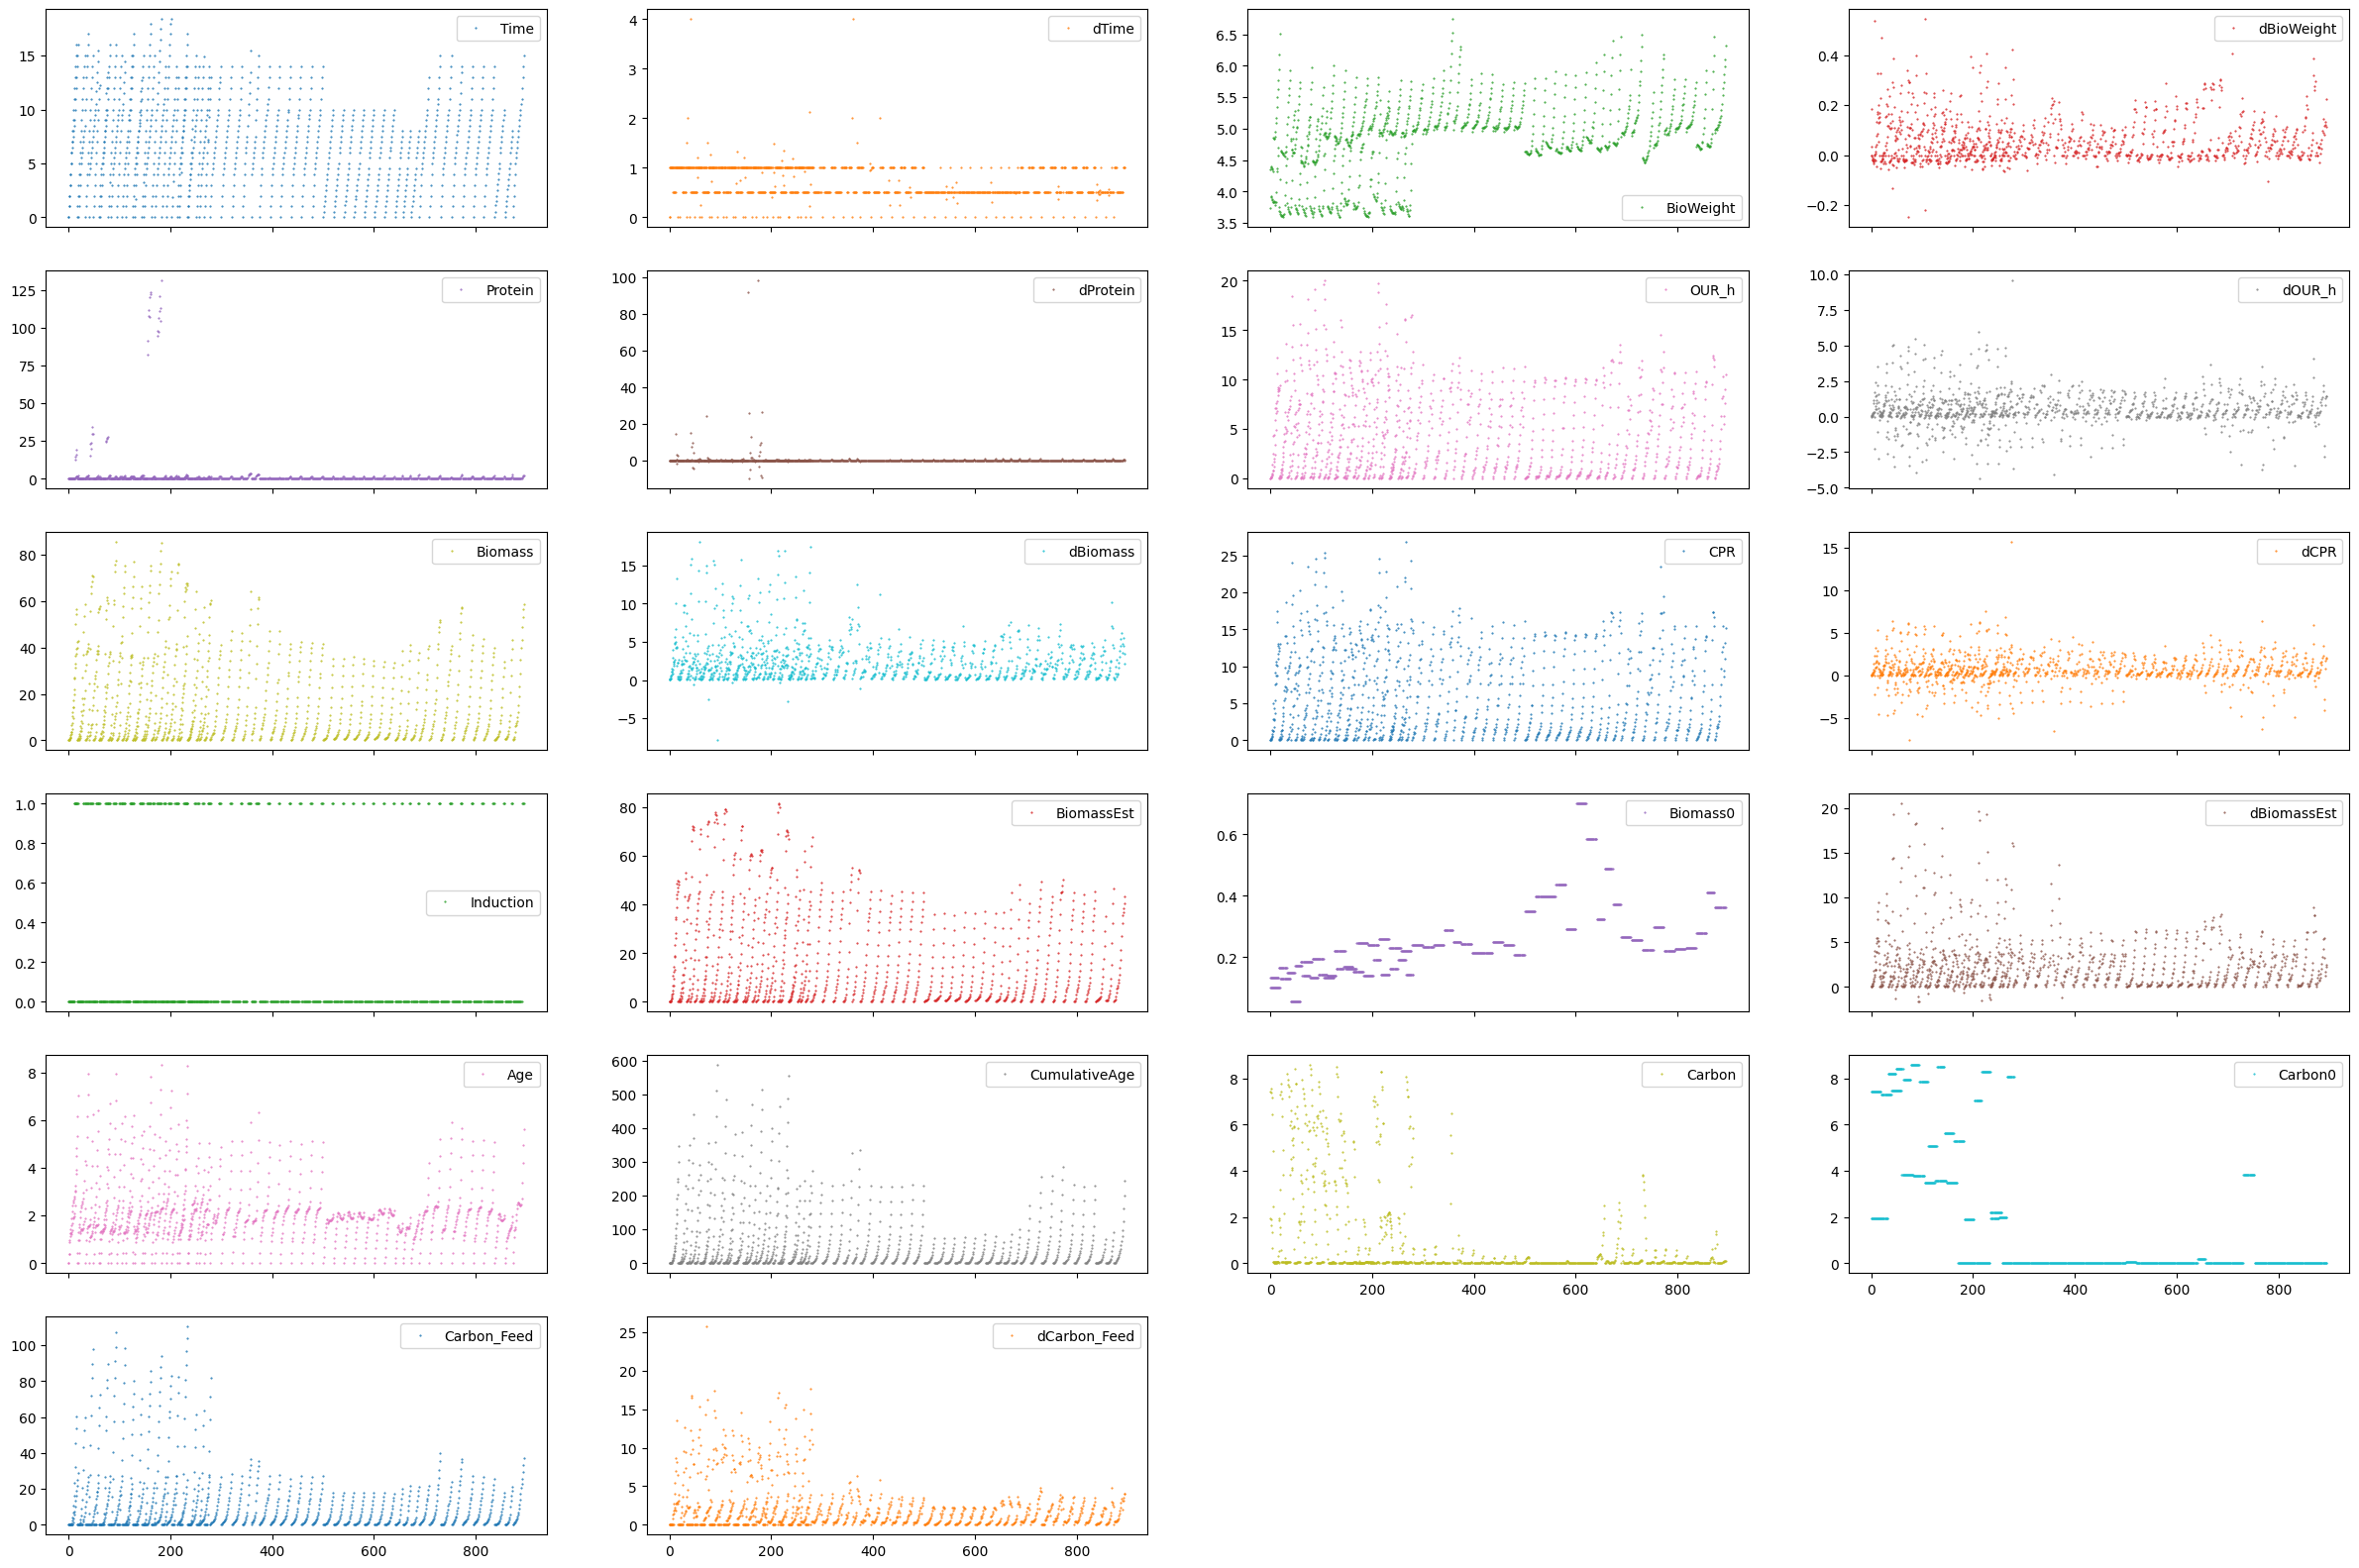

In [7]:
import matplotlib.pyplot as plt 
from Load_CleanData import Load_Clean_FERM,Load_Clean_BTPH, Load_Clean_GSK

BTPH_data = Load_Clean_BTPH(load_clean=True)
FERM_data = Load_Clean_FERM(load_clean=True)
GSK_data = Load_Clean_GSK(load_clean=True)

dataPool = pd.concat([BTPH_data, FERM_data], join='inner')
dataPool = BTPH_data
ig = dataPool[dataPool.isna().any(axis=1)]
display(ig)

plt.figure(figsize=(10, 8))
plt.imshow(dataPool.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

dataPool.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
        figsize=(30, 20), markersize=1)